In [5]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
import os
from PIL import Image
import time
from IPython.display import clear_output, display

In [6]:
class RacingDataset(Dataset):
    def __init__(self, data_dir, seq_len, transform=None):
        self.data_dir = data_dir
        self.seq_len = seq_len
        self.transform = transform
        self.image_raw_paths = os.listdir(data_dir) 
        self.image_paths = sorted(self.image_raw_paths, key=lambda x: int(x.split('_')[0])) # Ordenar las imágenes por número de secuencia
        self.data_dimension = self.get_data_dimension()   

    def load_data(self, idx):
        return Image.open(os.path.join(self.data_dir, self.image_paths[idx]))
    
    def get_data_dimension(self):
        image = self.load_data(0)
        return image.size

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        images_seq = []
        img_names = [] 

        # Comenzar desde idx - self.seq_len + 1 y terminar en idx
        for i in range(self.seq_len):
            current_idx = idx - self.seq_len + 1 + i

            image = self.load_data(current_idx)
            img_name = self.image_paths[current_idx]

            img_names.append(img_name)
            images_seq.append(image)

        label = int(self.image_paths[idx].split('_')[1].split(".")[0])

        if self.transform:
            images_seq = [self.transform(image) for image in images_seq]

        # Convertir la lista de imágenes a un tensor de tamaño (seq_len, Channels, Height, Width)

        if len(images_seq) > 0:
            images_seq = torch.stack(images_seq)
        else:
            raise RuntimeError("La lista de imágenes está vacía, no se puede apilar.")

        return images_seq, label, img_names

Longitud: 240, Ancho: 135


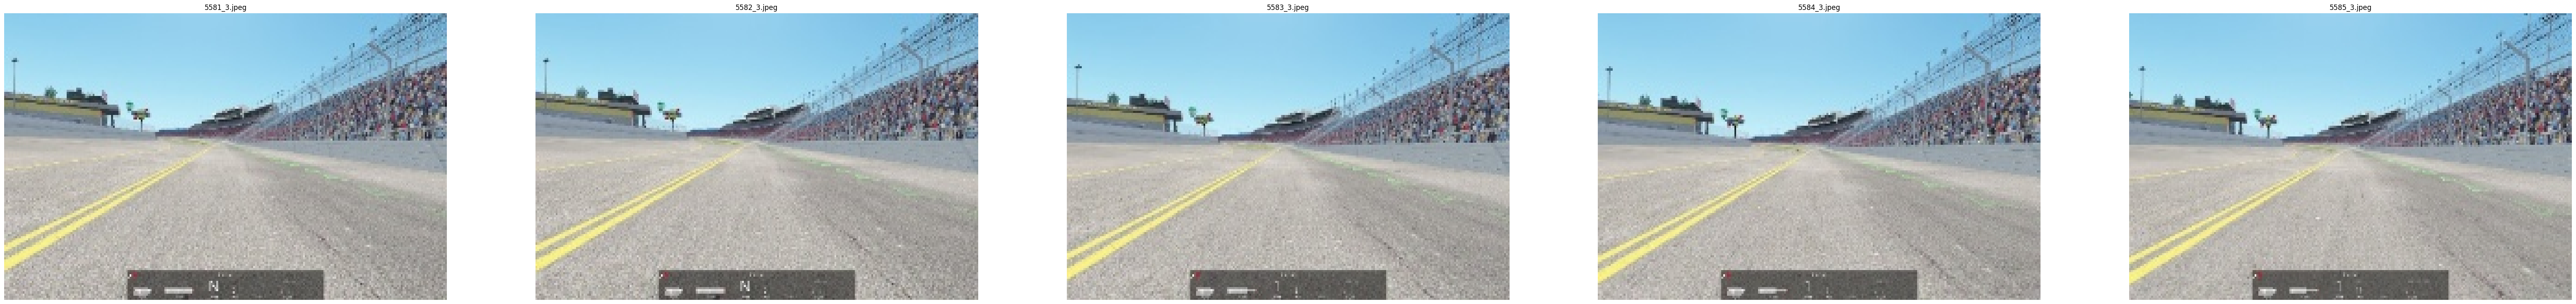

Tiempo de ejecución: 1.74 segundos


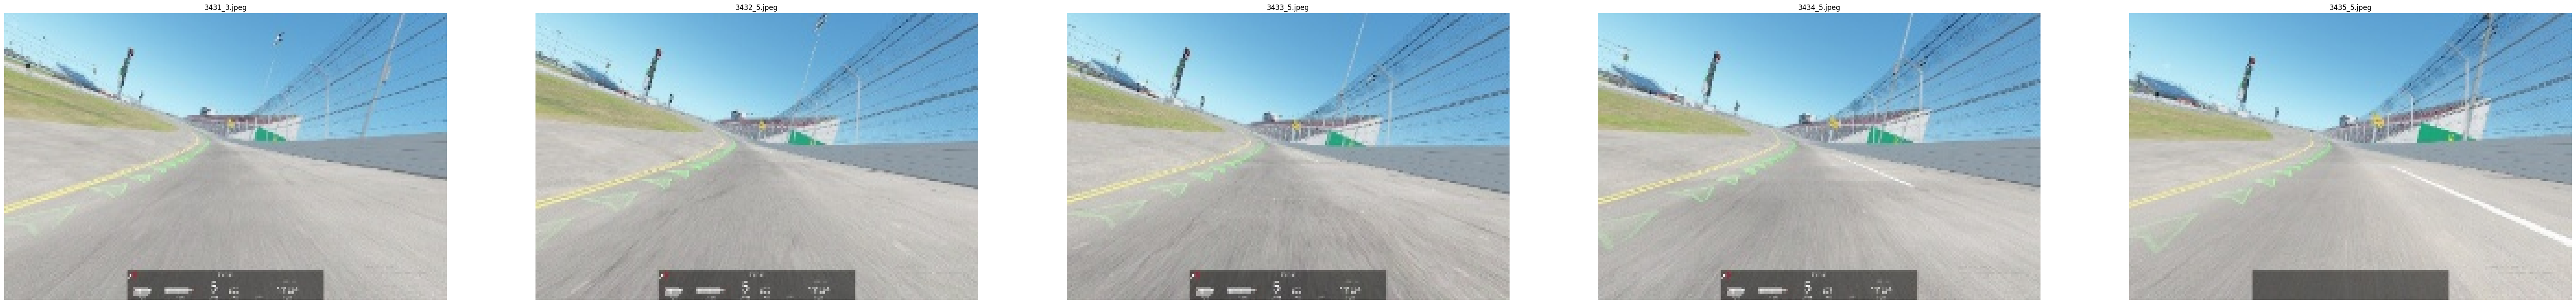

Tiempo de ejecución: 1.74 segundos


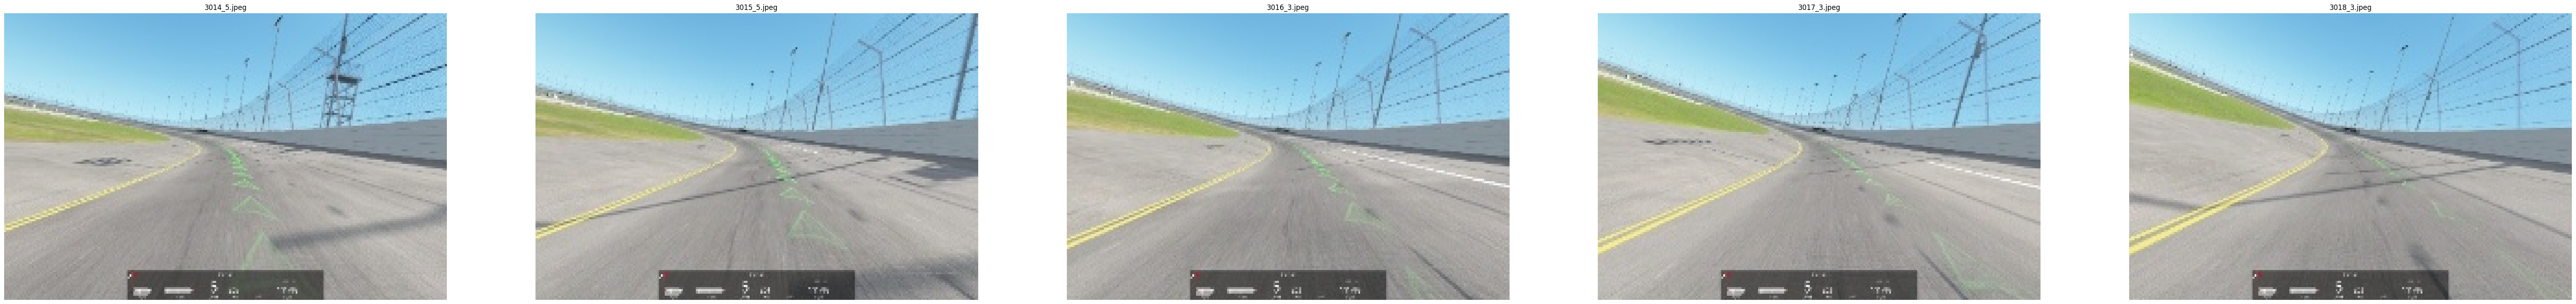

Tiempo de ejecución: 1.74 segundos


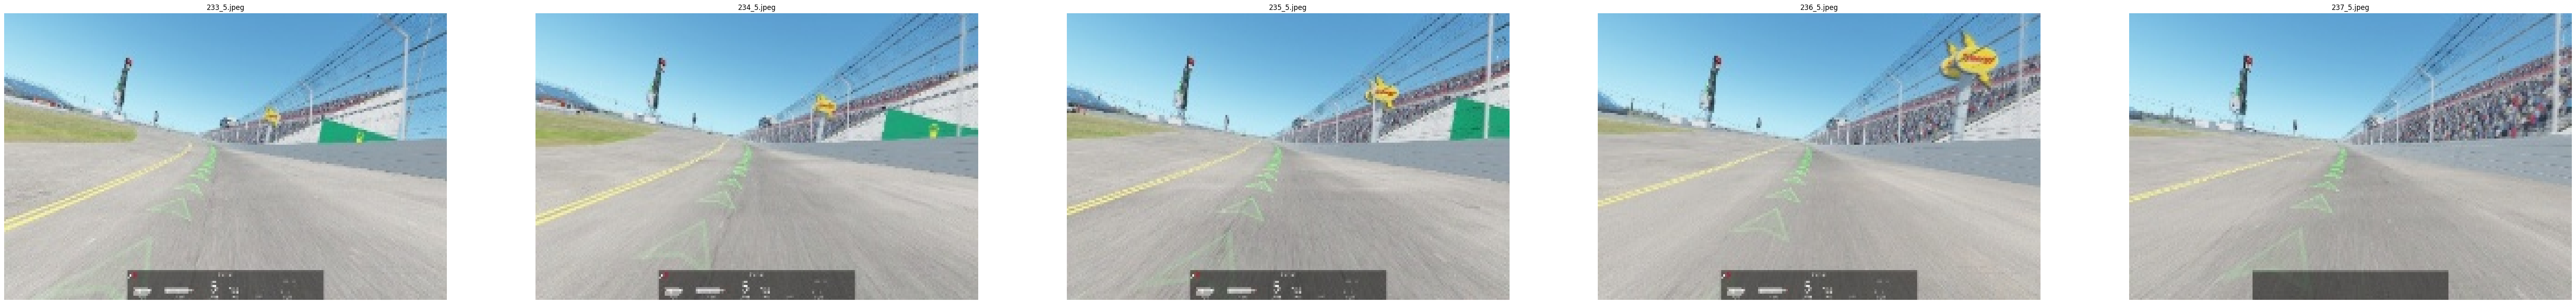

Tiempo de ejecución: 1.72 segundos


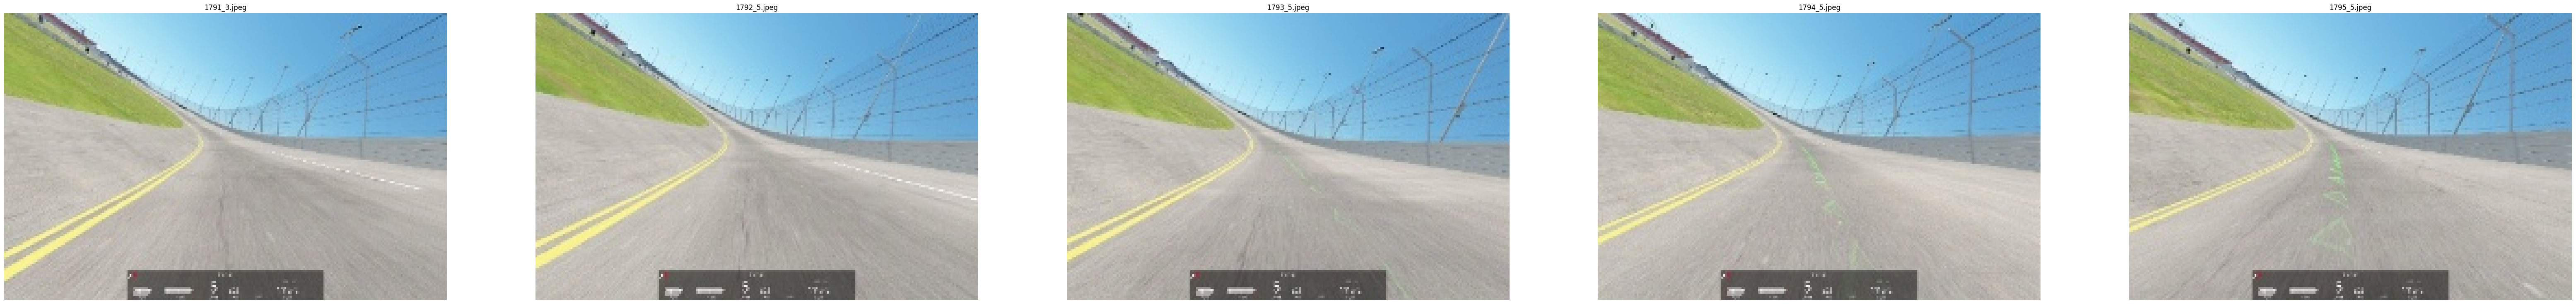

Tiempo de ejecución: 1.74 segundos


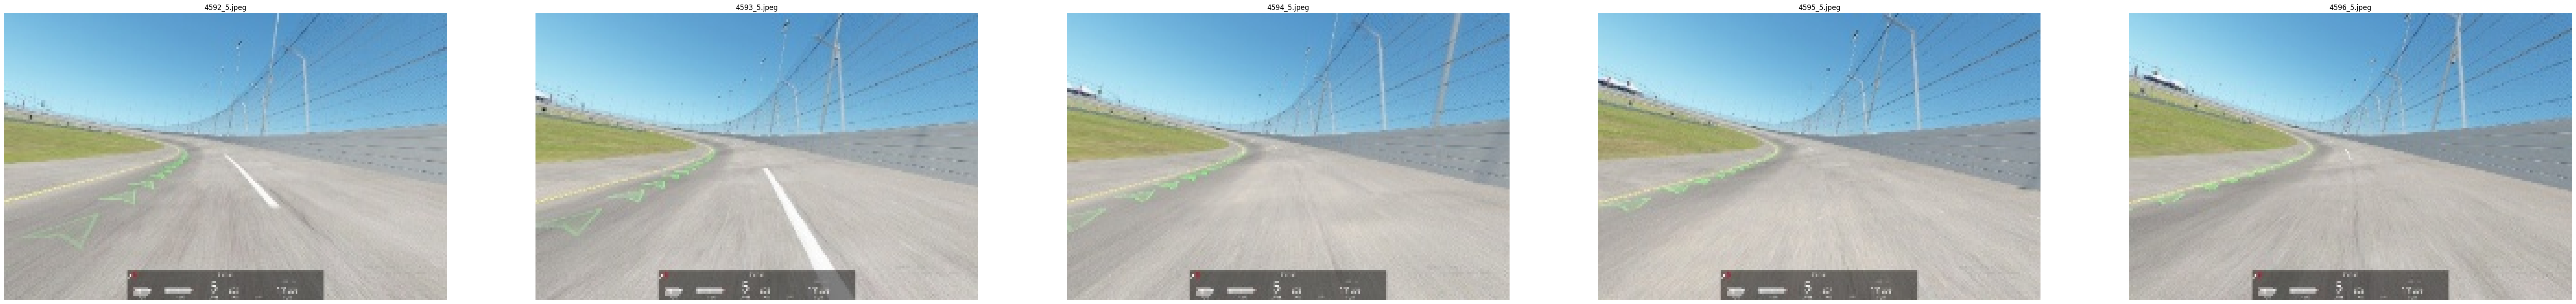

Tiempo de ejecución: 1.74 segundos


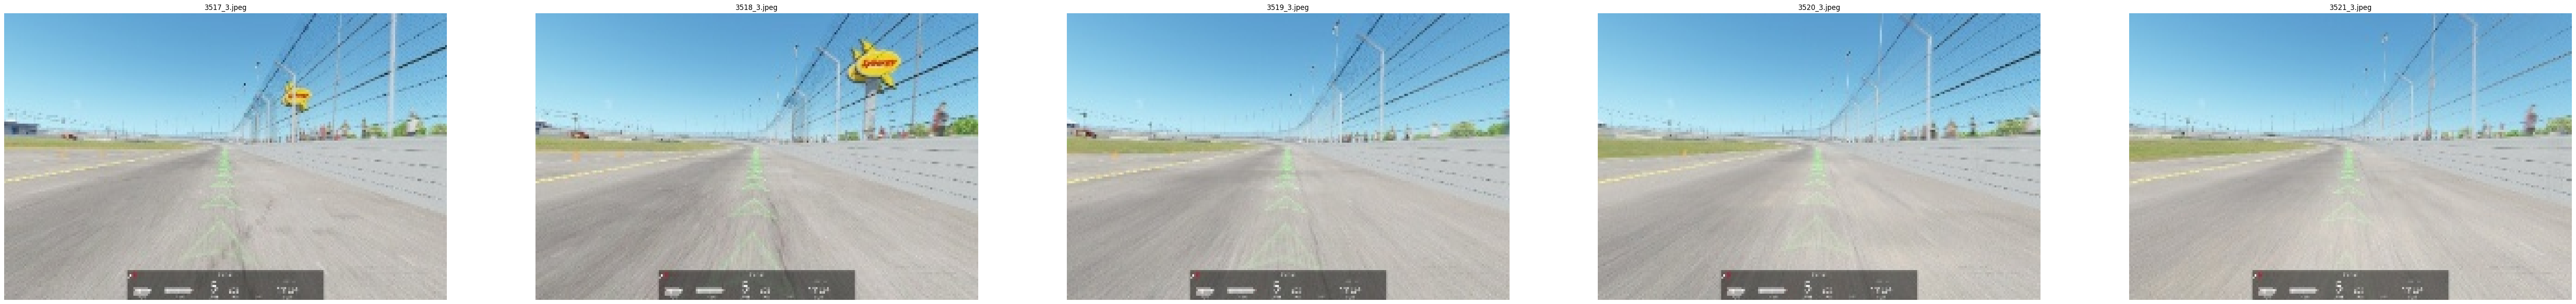

Tiempo de ejecución: 1.74 segundos


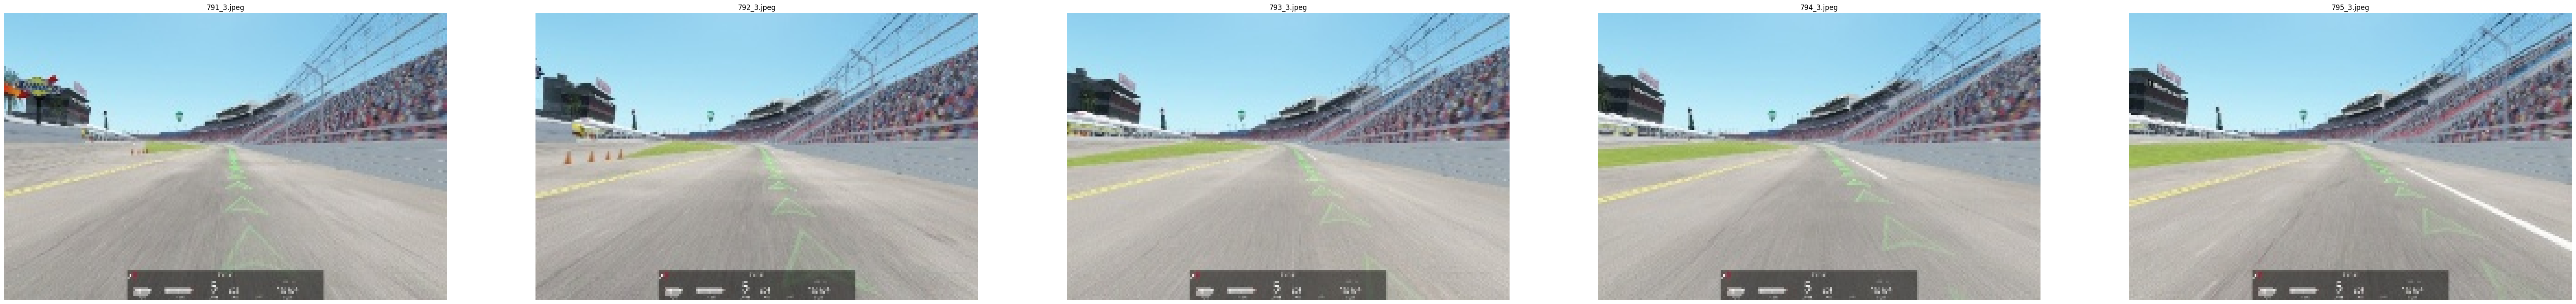

Tiempo de ejecución: 1.74 segundos


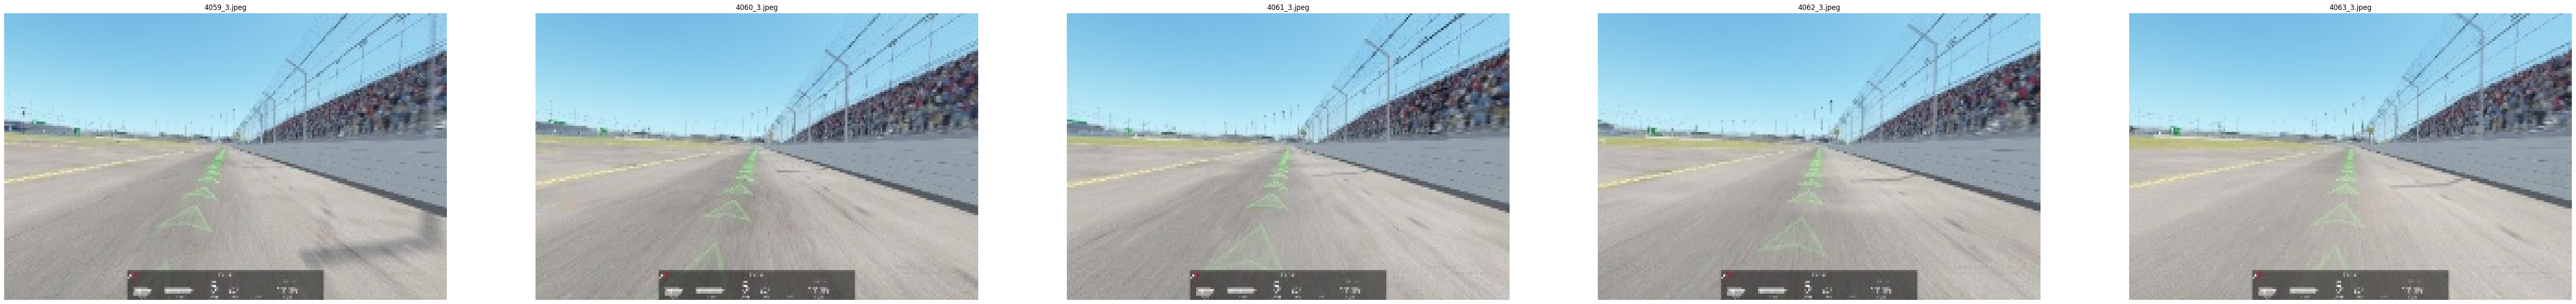

Tiempo de ejecución: 1.74 segundos


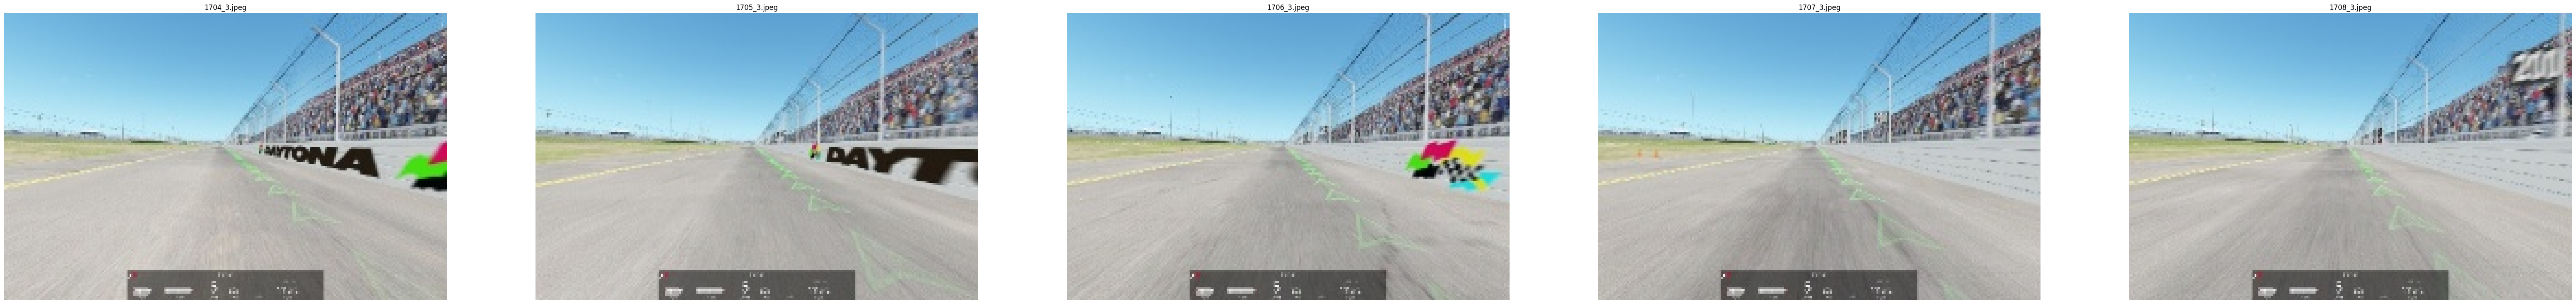

Tiempo de ejecución: 1.74 segundos


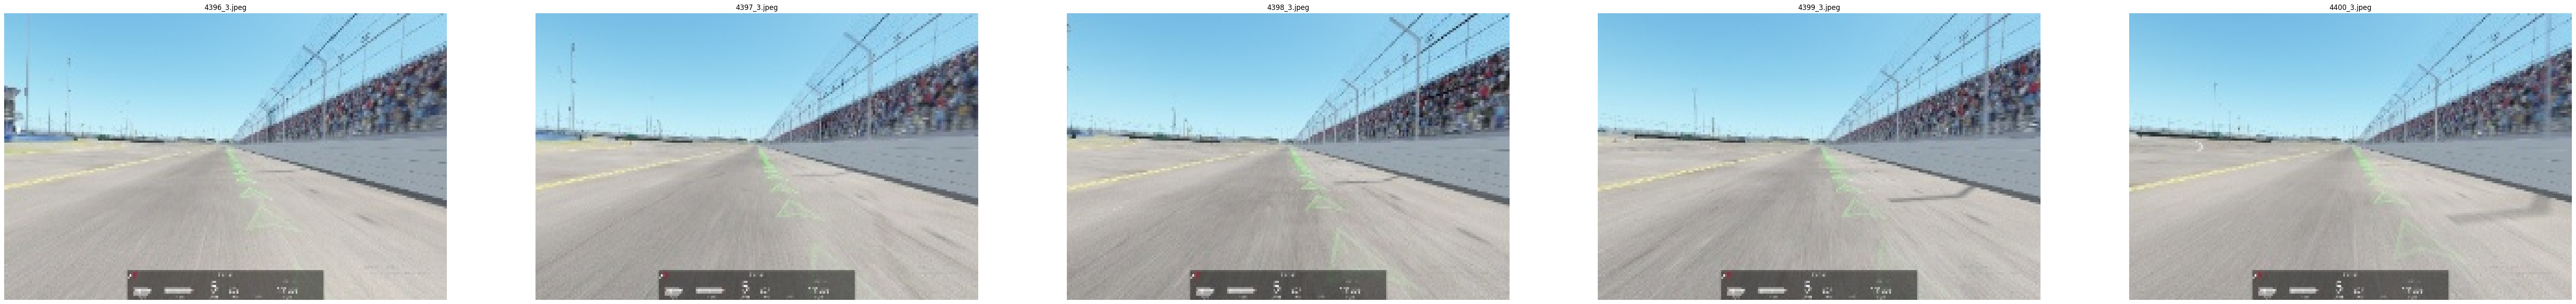

Tiempo de ejecución: 1.73 segundos


KeyboardInterrupt: 

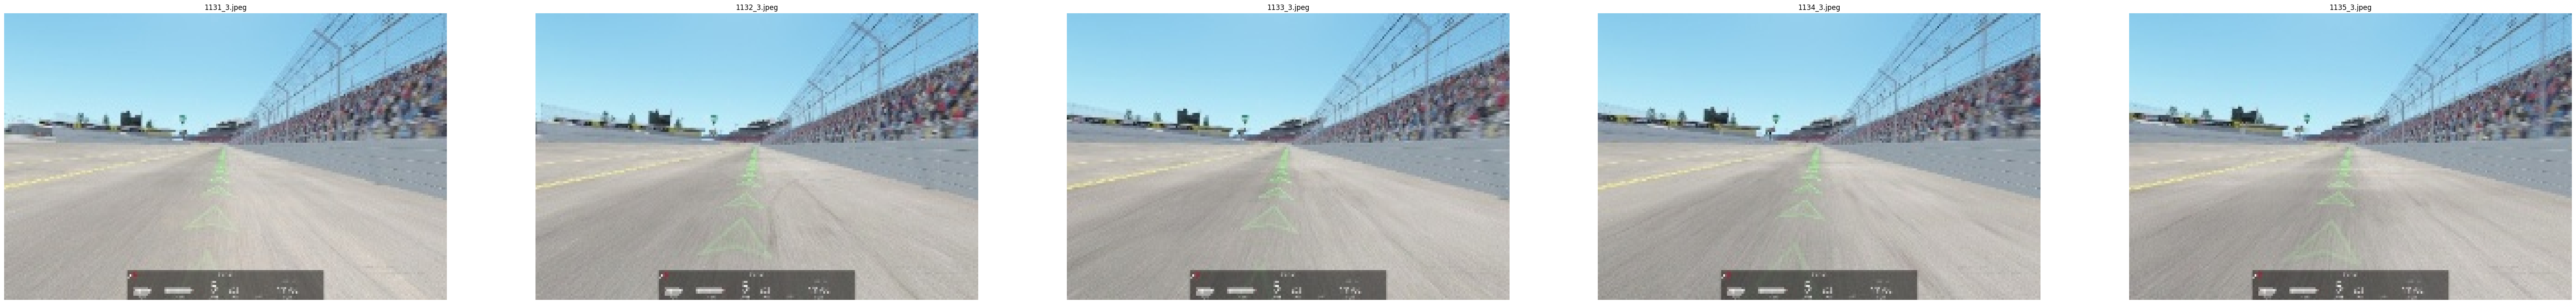

In [7]:
seq_len = 5  # Longitud de la secuencia
input_size = (240, 135)  # Tamaño de las imágenes
print("Cargango...", end="\r")

long_side = input_size[0]
short_side = int(long_side * 9 / 16)

print(f"Longitud: {long_side}, Ancho: {short_side}")

# Calcular el padding necesario
padding_top_bottom = (long_side - short_side) // 2



transform = transforms.Compose([
        #transforms.Resize((long_side, short_side)), # interpolation=Image.BILINEAR),
        #transforms.Pad((0, padding_top_bottom, 0, padding_top_bottom), fill=0, padding_mode='constant'),  # Rellenar para obtener el tamaño deseado
        transforms.ToTensor(),
    ])

# Crear una instancia del dataset
data_dir = '../datasets/balanced_data'#train_dataset'

# Comprobar que el directorio existe
if not os.path.exists(data_dir):
    raise RuntimeError(f"El directorio {data_dir} no existe.")

dataset = RacingDataset(data_dir, seq_len = seq_len, transform=transform)

dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Comprobar una muestra del datase

IMAGE_INDEX = 10

# Mostrar la primera imagen de la secuencia

# Tensor de tamaño (seq_len, Channels, Height, Width)

for i, (images, label, img_names) in enumerate(dataloader):
    if True: #i == IMAGE_INDEX:
        start_time = time.time()
        #print(f"Imagen {i}:")
        print(f"Etiqueta: {label.item()}", end="\r")
        #print(f"Forma del tensor de imágenes: {images.shape}")
        plt.figure( figsize=(16*seq_len, 9) )
        for j in range(seq_len):
            plt.subplot(1, seq_len, j + 1)
            plt.imshow(images[0][j].permute(1, 2, 0))
            plt.title(img_names[j][0])
            plt.axis('off')
            plt.gca().set_aspect('auto')  # Ajustar el aspecto de la imagen
        #plt.show()
        #time.sleep(1)
        
        display(plt.gcf())  # Muestra el gráfico actual
        time.sleep(1)  # Pausa para actualizar el gráfico
        plt.close()  # Cierra la figura para el siguiente gráfico
        print(f"Tiempo de ejecución: {time.time() - start_time:.2f} segundos")
    
# Mostrar la primera imagen de la secuencia
# Tensor de tamaño (seq_len, Channels, Height, Width)
""" for i, (images, label, img_names) in enumerate(dataloader):
    if i == IMAGE_INDEX:
        # Mostrar solo la primera imagen
        print(f"Etiqueta: {label.item()}", end="\r")
        
        for j in range(seq_len):
            # Convertir el tensor a una imagen PIL
            img_tensor = images[0][j]
            img_pil = transforms.ToPILImage()(img_tensor)
            
            # Mostrar la imagen en una ventana nueva
            img_pil.show(title=img_names[j][0])
        
        break  # Salir del bucle después de mostrar la primera imagen """